In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import warnings
from sklearn import linear_model, preprocessing
from sklearn.metrics import mean_squared_error, classification_report, precision_recall_fscore_support
from collections import Counter
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier
import itertools
warnings.filterwarnings('ignore')
%matplotlib inline
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/creditcard.csv')
df.head(n=10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [ ]:
df.shape

(284807, 31)

In [ ]:
df.columns.tolist()

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

In [ ]:
new_df = df.sample(frac=1,random_state=42).reset_index(drop=True)
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,1
1,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12,0
2,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00,0
3,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50,0
4,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89,0


In [ ]:
df_1 = new_df.iloc[:227845,:].reset_index(drop=True)
test = new_df.iloc[227845:,:].reset_index(drop=True)
train, valid = train_test_split(df_1,test_size=0.2)

In [ ]:
train.info()
print('*'*100)
valid.info()
print('*'*100)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182276 entries, 187796 to 217051
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    182276 non-null  float64
 1   V1      182276 non-null  float64
 2   V2      182276 non-null  float64
 3   V3      182276 non-null  float64
 4   V4      182276 non-null  float64
 5   V5      182276 non-null  float64
 6   V6      182276 non-null  float64
 7   V7      182276 non-null  float64
 8   V8      182276 non-null  float64
 9   V9      182276 non-null  float64
 10  V10     182276 non-null  float64
 11  V11     182276 non-null  float64
 12  V12     182276 non-null  float64
 13  V13     182276 non-null  float64
 14  V14     182276 non-null  float64
 15  V15     182276 non-null  float64
 16  V16     182276 non-null  float64
 17  V17     182276 non-null  float64
 18  V18     182276 non-null  float64
 19  V19     182276 non-null  float64
 20  V20     182276 non-null  float64
 21  V21  

In [ ]:
print(pd.isnull(train).sum())
print('*'*100)
print(pd.isnull(valid).sum())
print('*'*100)
print(pd.isnull(test).sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
****************************************************************************************************
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
****************************************************************************************************
Time      0
V1        0
V2  

In [ ]:
print(train['Class'].value_counts())
print('*'*100)
print(valid['Class'].value_counts())
print('*'*100)
print(test['Class'].value_counts())

0    181968
1       308
Name: Class, dtype: int64
****************************************************************************************************
0    45490
1       79
Name: Class, dtype: int64
****************************************************************************************************
0    56857
1      105
Name: Class, dtype: int64


In [ ]:
train.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

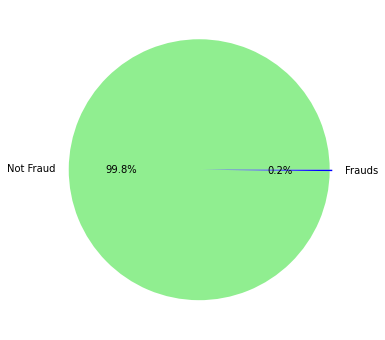

In [ ]:
plt.figure(figsize=(10,6))
labels=['Not Fraud' , 'Frauds']
explode = [.01,.01]
color=['LightGreen' , 'Blue']
sizes=df.Class.value_counts().values

plt.pie(sizes,explode,labels,autopct="%1.1f%%", colors = color)
plt.show()

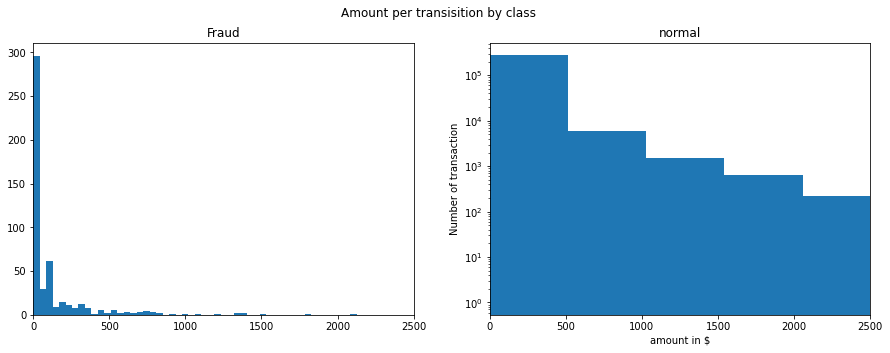

In [ ]:
fraud=df[df['Class']==1]
normal=df[df['Class']==0]

f,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5),sharex=True)
f.suptitle('Amount per transisition by class')
bins =50
ax1.hist(fraud.Amount , bins=bins)
ax1.set_title('Fraud')

ax2.hist(normal.Amount,bins=bins)
ax2.set_title('normal')

plt.xlabel('amount in $')
plt.ylabel('Number of transaction')

plt.xlim(0,2500)
plt.yscale('log')
plt.show()

In [ ]:
df[df['Class']==0].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,284315.0,94838.202258,47484.015786,0.000000,54230.000000,84711.000000,139333.000000,172792.000000
V1,284315.0,0.008258,1.929814,-56.407510,-0.917544,0.020023,1.316218,2.454930
V2,284315.0,-0.006271,1.636146,-72.715728,-0.599473,0.064070,0.800446,18.902453
V3,284315.0,0.012171,1.459429,-48.325589,-0.884541,0.182158,1.028372,9.382558
V4,284315.0,-0.007860,1.399333,-5.683171,-0.850077,-0.022405,0.737624,16.875344
V5,284315.0,0.005453,1.356952,-113.743307,-0.689398,-0.053457,0.612181,34.801666
V6,284315.0,0.002419,1.329913,-26.160506,-0.766847,-0.273123,0.399619,73.301626
V7,284315.0,0.009637,1.178812,-31.764946,-0.551442,0.041138,0.571019,120.589494
V8,284315.0,-0.000987,1.161283,-73.216718,-0.208633,0.022041,0.326200,18.709255
V9,284315.0,0.004467,1.089372,-6.290730,-0.640412,-0.049964,0.598230,15.594995


In [ ]:
df[df['Class']==1].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,492.0,80746.806911,47835.365138,406.000000,41241.500000,75568.500000,128483.000000,170348.000000
V1,492.0,-4.771948,6.783687,-30.552380,-6.036063,-2.342497,-0.419200,2.132386
V2,492.0,3.623778,4.291216,-8.402154,1.188226,2.717869,4.971257,22.057729
V3,492.0,-7.033281,7.110937,-31.103685,-8.643489,-5.075257,-2.276185,2.250210
V4,492.0,4.542029,2.873318,-1.313275,2.373050,4.177147,6.348729,12.114672
V5,492.0,-3.151225,5.372468,-22.105532,-4.792835,-1.522962,0.214562,11.095089
V6,492.0,-1.397737,1.858124,-6.406267,-2.501511,-1.424616,-0.413216,6.474115
V7,492.0,-5.568731,7.206773,-43.557242,-7.965295,-3.034402,-0.945954,5.802537
V8,492.0,0.570636,6.797831,-41.044261,-0.195336,0.621508,1.764879,20.007208
V9,492.0,-2.581123,2.500896,-13.434066,-3.872383,-2.208768,-0.787850,3.353525


In [ ]:
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
names = train.columns
d = scaler.fit_transform(train)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.357297,0.977844,0.735707,0.752364,0.196624,0.578518,0.560240,0.478895,0.793422,0.465269,...,0.556878,0.426547,0.671011,0.566537,0.596512,0.566346,0.647533,0.341033,0.000053,0.0
1,0.739479,0.984386,0.733790,0.734158,0.299318,0.569061,0.515456,0.490651,0.786724,0.460816,...,0.564843,0.506589,0.668041,0.178131,0.593288,0.361145,0.650135,0.339143,0.006744,0.0
2,0.244166,0.976593,0.741837,0.778640,0.265097,0.556790,0.494146,0.485056,0.785245,0.454831,...,0.556532,0.430576,0.669361,0.288011,0.598165,0.449564,0.649259,0.341404,0.000047,0.0
3,0.428405,0.975364,0.738307,0.789678,0.280893,0.550457,0.492521,0.484703,0.784267,0.478000,...,0.556181,0.435893,0.668979,0.353918,0.604416,0.462570,0.649551,0.341545,0.001586,0.0
4,0.746834,0.944087,0.746032,0.777418,0.244498,0.570822,0.463398,0.497785,0.780291,0.463420,...,0.565804,0.528292,0.666980,0.388514,0.555949,0.398285,0.658452,0.343861,0.001027,0.0


In [ ]:
#Oversampling
X_train, y_train = train.drop(['Class'], axis = 1), train['Class']
sm = SMOTE(random_state = 42)
X_train, y_train = sm.fit_resample(X_train, y_train)#.ravel())

In [ ]:
lg=LogisticRegression()
lg.fit(X_train,y_train)
lg_pred=lg.predict(valid.drop(['Class'],axis=1))

In [ ]:
print(classification_report(valid['Class'],lg_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     45490
           1       0.08      0.89      0.14        79

    accuracy                           0.98     45569
   macro avg       0.54      0.93      0.57     45569
weighted avg       1.00      0.98      0.99     45569



In [ ]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(10,2),
                        max_iter = 10,activation = 'relu',
                        solver = 'adam')

In [ ]:
mlp_clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 2), max_iter=10)

In [ ]:
mlp_pred = mlp_clf.predict(valid.drop(['Class'],axis=1))
print(classification_report(valid['Class'],mlp_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45490
           1       0.00      0.00      0.00        79

    accuracy                           1.00     45569
   macro avg       0.50      0.50      0.50     45569
weighted avg       1.00      1.00      1.00     45569



In [ ]:
mlp_clf_iter25 = MLPClassifier(hidden_layer_sizes=(15,2),
                        max_iter = 25,activation = 'relu',
                        solver = 'adam')

mlp_clf_iter25.fit(X_train, y_train)

y_pred_25 = mlp_clf_iter25.predict(test.drop(['Class'],axis=1))

print('Accuracy: {:.2f}'.format(accuracy_score(test['Class'], y_pred_25)))

Accuracy: 1.00


In [ ]:
mlp_clf_iter50 = MLPClassifier(hidden_layer_sizes=(15,2),
                        max_iter = 50,activation = 'relu',
                        solver = 'adam')

mlp_clf_iter50.fit(X_train, y_train)

y_pred_50 = mlp_clf_iter50.predict(test.drop(['Class'],axis=1))

print('Accuracy: {:.2f}'.format(accuracy_score(test['Class'], y_pred_50)))

Accuracy: 0.98


In [ ]:
mlp_clf_iter75 = MLPClassifier(hidden_layer_sizes=(15,2),
                        max_iter = 75,activation = 'relu',
                        solver = 'adam')

mlp_clf_iter75.fit(X_train, y_train)

y_pred_75 = mlp_clf_iter75.predict(test.drop(['Class'],axis=1))

print('Accuracy: {:.2f}'.format(accuracy_score(test['Class'], y_pred_75)))

Accuracy: 0.00
